
## <center> Логистическая регрессия в задаче кредитного скоринга


#### Данные представлены следующим образом:

##### Прогнозируемая  переменная
* SeriousDlqin2yrs	      – Человек не выплатил данный кредит в течение 90 дней; возможные значения  1/0 

##### Независимые признаки
* age	                          –  Возраст заёмщика кредитных средств; тип - integer
* NumberOfTime30-59DaysPastDueNotWorse	 – Количество раз, когда человек имел просрочку выплаты других кредитов более 30-59 дней, но не больше в течение последних двух лет; тип -	integer
* DebtRatio  – 	Ежемесячный отчисления на задолжености(кредиты,алименты и т.д.)  / совокупный месячный доход 	percentage; тип -	real
* MonthlyIncome	 – Месячный доход в долларах; тип -	real
* NumberOfTimes90DaysLate  – Количество раз, когда человек имел просрочку выплаты других кредитов более 90 дней; тип -	integer
* NumberOfTime60-89DaysPastDueNotWorse – 	Количество раз, когда человек имел просрочку выплаты других кредитов более 60-89 дней, но не больше в течение последних двух лет; тип -	integer
* NumberOfDependents  – Число человек в семье кредитозаёмщика; тип -	integer

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# отключим предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
# Считываем данные
data = pd.read_csv('credit_scoring_sample.csv', sep =';')
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [3]:
# отделяем целевой принзак от всех остальных
X = data[[x for x in data if x != 'SeriousDlqin2yrs']]
y = data['SeriousDlqin2yrs']

## Ваша задача: обучить модель, предсказывающую SeriousDlqin2yrs (1 - человек просрочит кредит, 0 - выплатит вовремя)

1) Посмотрите на графике как распределена целевая переменная (насколько сбалансированы классы)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

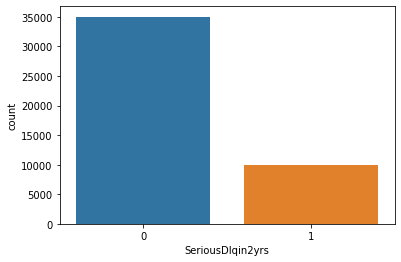

In [4]:
sns.countplot(y)

Можно видеть, что классы очень плохо сбалансированы - 0 более чем в 3 раза превосходит 1

Постройте heatmap всех фич друг с другом, если есть корреляция больше 0.9 - удалите одну из фич

<AxesSubplot:>

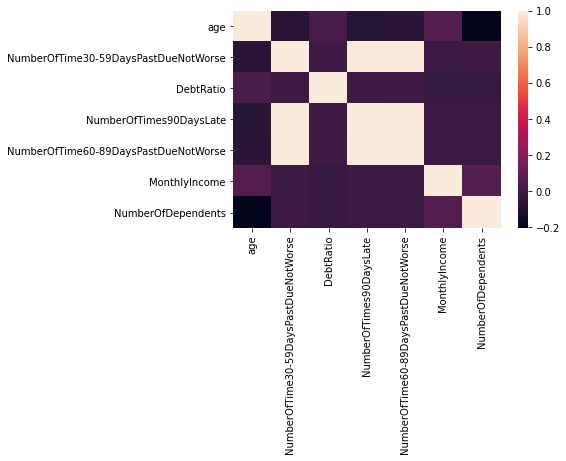

In [5]:
sns.heatmap(X.corr())

Очень сильная корреляция наблюдается у признаков NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate и NumberOfTime60-89DaysPastDueNotWorse

Оставим только признак NumberOfTime60-89DaysPastDueNotWorse, т.к. он описыват среднюю продолжительность долга

In [6]:
X = X.drop(axis=1, labels=['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'])
X

,age,DebtRatio,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,64,0.249908,0,8158.0,0.0
1,58,3870.000000,0,NaN,0.0
2,41,0.456127,0,6666.0,0.0
3,43,0.000190,0,10500.0,2.0
4,49,0.271820,0,400.0,0.0
...,...,...,...,...,...
45058,31,0.824725,0,3000.0,1.0
45059,49,6530.000000,0,0.0,5.0
45060,38,0.475841,0,3000.0,2.0
45061,47,0.485198,0,11720.0,5.0


2) Разбейте данные на train и test (укажите в параметрах random_state = 17 и stratify = y)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)

3) Работа с train данными:

    - замените пропуски на медианное значение 
    - отмасштабируйте все признаки(любым способом)

In [8]:
X_train = X_train.fillna(X_train.median())

In [9]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler().fit(X_train)

cols = X_train.columns
X_train = pd.DataFrame(mmscaler.transform(X_train), columns=cols)

In [10]:
X_train

,age,DebtRatio,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0.069767,0.000000e+00,0.000000,0.001115,0.000000
1,0.639535,5.068404e-07,0.010204,0.003601,0.000000
2,0.313953,8.810417e-07,0.000000,0.006302,0.000000
3,0.232558,7.204220e-07,0.000000,0.005574,0.222222
4,0.546512,1.672579e-03,0.000000,0.002880,0.000000
...,...,...,...,...,...
33792,0.546512,2.447602e-03,0.000000,0.002880,0.000000
33793,0.430233,6.182875e-07,0.000000,0.000850,0.000000
33794,0.127907,1.679141e-06,0.010204,0.001904,0.222222
33795,0.151163,1.138499e-06,0.020408,0.000707,0.111111


4) Обучите логистическую регрессию с кросс-валидацией на train данных, в параметрах модели задайте:

  - метрику качества модели - roc_auc
 
  - random_state=17
 
Замерьте roc_auc - это будет ваша базовая модель.

In [11]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [12]:
lr_base = LogisticRegressionCV(scoring='roc_auc', random_state=17).fit(X_train, y_train)

In [13]:
roc_auc_base = roc_auc_score(y_train, lr_base.predict(X_train))
roc_auc_base

0.5069246449472129

5) Чтобы добиться более высокого показателя roc_auc подберите параметр C, попробуйте другой вид регуляризации, добавьте балансировку классов и кроссвалидацию = StratifiedKFold (можно поиграться с кол-во фолдов). Замерьте получившийся roc_auc и выведите оптимальное значение C.

In [14]:
lr_trying_best = LogisticRegressionCV(
    Cs = np.linspace(1e-4, 1000, 200),
    penalty = 'l2',
    class_weight = 'balanced',
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5),
    random_state=17,
    scoring='roc_auc'
).fit(X_train, y_train)

roc_auc_trying_best = roc_auc_score(y_train, lr_trying_best.predict(X_train))
print(roc_auc_trying_best)
print(lr_trying_best.C_)

0.6358093529929673
[869.34674673]


Посчитайте долю влияния фичи MonthlyIncome на итоговое предсказание.

In [15]:
pd.DataFrame(lr_trying_best.coef_, columns=cols)

,age,DebtRatio,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,-2.646208,-4.136473,49.339921,-33.090379,0.883037


In [16]:
contribution = pd.DataFrame((np.exp(lr_trying_best.coef_) / np.exp(lr_trying_best.coef_).sum()), columns=cols)
contribution

,age,DebtRatio,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,2.646738e-23,5.963445e-24,1.0,1.588458e-36,9.024911e-22


In [17]:
contribution.iloc[0].sum()

1.0

Как можно видеть, признак MonthlyIncome имеет совсем малый вклад в итоговое предсказание

6) В цикле обучите несколько моделей лог регрессии с подобранными оптимальными параметрами на шаге 5, но с разным параметром C, и постройте графики изменения roc_auc на train и test выборках в зависимости от С (пример есть в hw_log_regression answers.ipynb в самом конце ноутбука)

Если модель стабильна, то поведение графиков должно совпадать

In [18]:
X_test = X_test.fillna(X_train.median())

cols = X_test.columns
X_test = pd.DataFrame(mmscaler.transform(X_test), columns=cols)

In [19]:
logr_train_scores, logr_test_scores = [], []
cs = np.linspace(1e-4, 1000, 200)

for c in cs:
    logr = LogisticRegression(C=c, random_state=17, class_weight='balanced')
    logr.fit(X_train, y_train)
    logr_train_scores.append(roc_auc_score(y_train, logr.predict(X_train)))
    logr_test_scores.append(roc_auc_score(y_test, logr.predict(X_test)))

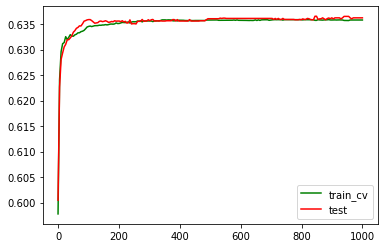

In [20]:
plt.plot(cs, logr_train_scores, color='green', label='train_cv')
plt.plot(cs, logr_test_scores, color='red', label='test')
plt.legend()

Поведение графиков совпадает, следовательно, модель стабильна

7*) g

In [63]:
#g